In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 120)

In [154]:
pwd

'/Users/karthikeyan/Desktop/upgrad/Case_Studies'

In [155]:
data = pd.read_csv('Data/loan.csv')

/Users/karthikeyan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [156]:
data = data[data['loan_status'] != 'Current'].reset_index(drop=True)

In [157]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Gives you spread of all the columns

In [158]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,13672.000000,2740.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.0,38577.0,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38521.0,0.0,38577.0,0.0,0.0,0.0,38577.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38521.0,38577.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37880.000000,38538.0,0.0,0.0,0.0,0.0
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.146668,0.871737,35.882534,69.260949,9.275423,0.055422,13289.489826,22.052648,0.0,0.0,11866.970365,11271.196153,9648.322898,2119.243370,1.368634,98.035545,12.772728,2746.243218,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043479,0.0,NaN,NaN,NaN,NaN
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.492271,1.071546,22.028093,43.987761,4.401588,0.237804,15866.492241,11.425861,0.0,0.0,8809.856227,8700.845592,7009.381200,2389.499511,7.315880,698.650182,150.836853,4494.648131,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204583,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,18.000000,19.750000,6.000000,0.000000,3650.000000,13.000000,0.0,0.0,5513.497338,5019.590000,4500.000000,643.990000,0.000000,0.000000,0.000000,217.420000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.564230

## Gives the total number os missing values across all the columns

In [159]:
data.isnull().sum(axis = 0)

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2386
emp_length                         1033
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12527
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [160]:
data.shape

(38577, 111)

## Remove all the columns with more than 50 percent of null values - Data driven approach

In [161]:
round(data.shape[0] * 50 /100)

19288

In [162]:
data = data.dropna(thresh=round(data.shape[0] * 50 /100), axis=1)

## Remove unwanted rows - Business/Domain driven.

In [163]:
data = data.drop(['id', 'member_id', 'application_type', 'emp_title', 'desc', 'zip_code','earliest_cr_line','application_type'], axis= 1)


In [164]:
data.shape

(38577, 47)

# unique number of values in each of the columns. Just to check if there is any variance in each column

In [165]:
data.nunique(dropna=False) 

loan_amnt                       870
funded_amnt                    1019
funded_amnt_inv                8050
term                              2
int_rate                        370
installment                   15022
grade                             7
sub_grade                        35
emp_length                       12
home_ownership                    5
annual_inc                     5215
verification_status               3
issue_d                          55
loan_status                       2
pymnt_plan                        1
url                           38577
purpose                          14
title                         19298
addr_state                       50
dti                            2853
delinq_2yrs                      11
inq_last_6mths                    9
open_acc                         40
pub_rec                           5
revol_bal                     21275
revol_util                     1089
total_acc                        82
initial_list_status         

# Dropping off some variables which doesnot have any variance

In [166]:
data = data.drop(['pymnt_plan', 'url', 'title', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq'
          ,'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'], axis =1 )


# Lets do some univariate & segmented univariate analysis

In [167]:
data['annual_inc'] = data['annual_inc'].astype('int')

In [168]:
data['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [169]:
data.loc[(data.annual_inc < 40000), 'annual_category'] = 'Low_salary'
data.loc[( (data.annual_inc > 40000) & (data.annual_inc < 80000) ), 'annual_category'] = 'Avg_salary'
data.loc[(data.annual_inc > 80000) , 'annual_category'] = 'High_salary'

In [170]:
data.annual_category.value_counts()

Avg_salary     18248
High_salary     9995
Low_salary      8843
Name: annual_category, dtype: int64

In [171]:
data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

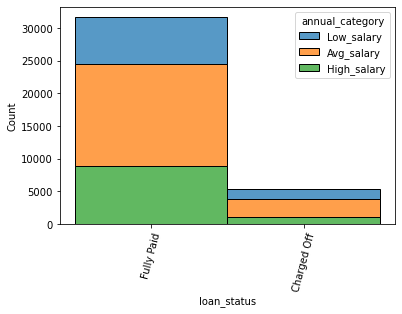

In [172]:
sns.histplot(binwidth=0.5, x="loan_status", hue="annual_category", data=data, stat="count", multiple="stack")
plt.xticks(rotation=75)
plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

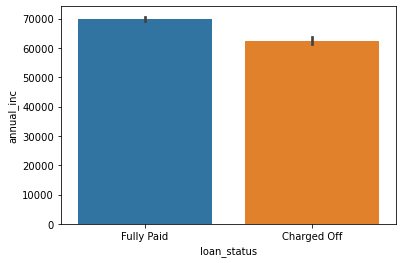

In [173]:
sns.barplot(x = 'loan_status',y = 'annual_inc',data = data)

## We see that there is a higher default percentage for credit card and loan consolidation

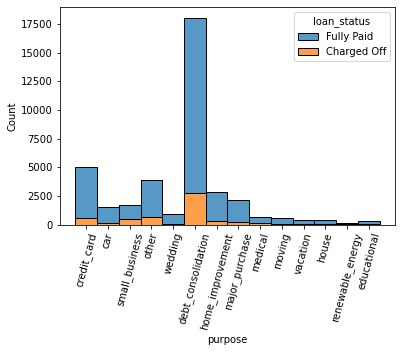

In [174]:
sns.histplot(binwidth=0.5, x="purpose", hue="loan_status", data=data, stat="count", multiple="stack")
plt.xticks(rotation=75)
plt.show()

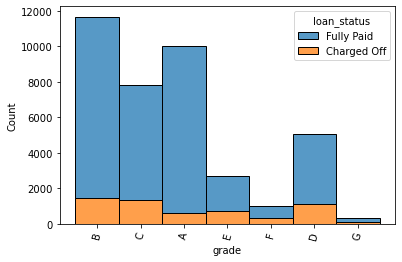

In [175]:
sns.histplot(binwidth=0.5, x="grade", hue="loan_status", data=data, stat="count", multiple="stack")
plt.xticks(rotation=75)
plt.show()

In [176]:
data['term'] = data['term'].astype(str).str.replace('months', '')
data['term'] = data['term'].astype(str).str.strip()

# From the below chart you also see the higher the term higer the charge off percentage

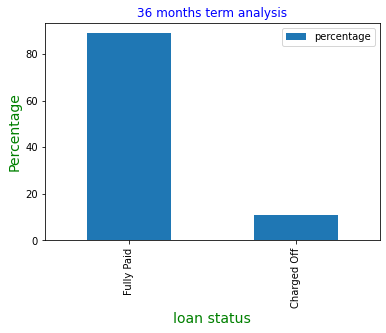

In [177]:
data_term_36 = pd.DataFrame(data[data['term'] == '36']['loan_status'].value_counts()).reset_index()
data_term_36['percentage'] = (data_term_36['loan_status'] / data_term_36['loan_status'].sum()) * 100
data_term_36.plot(kind='bar', x='index', y='percentage')
plt.title("36 months term analysis", color = 'b')
plt.xlabel("loan status", fontsize=14, color = 'g')
plt.ylabel("Percentage", fontsize=14, color ='g')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

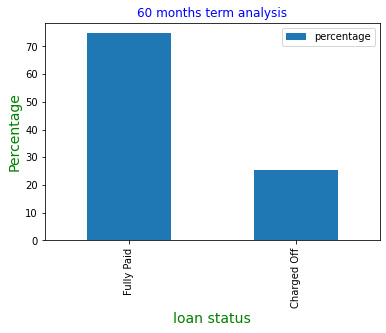

In [178]:
data_term_60 = pd.DataFrame(data[data['term'] == '60']['loan_status'].value_counts()).reset_index()
data_term_60['percentage'] = (data_term_60['loan_status'] / data_term_60['loan_status'].sum()) * 100
data_term_60.plot(kind='bar', x='index', y='percentage')
plt.title("60 months term analysis", color = 'b')
plt.xlabel("loan status", fontsize=14, color = 'g')
plt.ylabel("Percentage", fontsize=14, color ='g')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## home ownership relation with Loan repayment

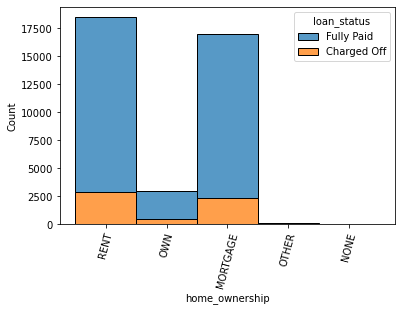

In [179]:
sns.histplot(binwidth=0.5, x="home_ownership", hue="loan_status", data=data, stat="count", multiple="stack")
plt.xticks(rotation=75)
plt.show()

In [180]:
data_unpaid = data[data['loan_status'] != 'Current'].reset_index(drop=True)
data_unpaid = pd.DataFrame(data_unpaid.groupby(['home_ownership', 'loan_status'])['loan_status'].count())
data_unpaid.columns = ['count']
data_unpaid = data_unpaid.reset_index()

In [181]:
data_unpaid['paid_percent'] = data_unpaid['count']/data_unpaid['count'].sum() *100

In [182]:
data_unpaid_per = data_unpaid.groupby('loan_status')['paid_percent'].sum().reset_index()

In [183]:
data_unpaid_per

,loan_status,paid_percent
0,Charged Off,14.586412
1,Fully Paid,85.413588


## Percentage of Fully paid vs Charged Off - We observe that 15% of overall customers are not paying the loans

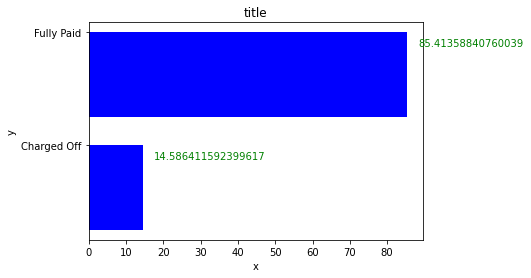

In [184]:
fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(data_unpaid_per['paid_percent']))  # the x locations for the groups

for i, v in enumerate(data_unpaid_per['paid_percent']):
    ax.text(v + 3, i + .25, str(v), color='green')
    
ax.barh(ind, data_unpaid_per['paid_percent'], width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(data_unpaid_per['loan_status'], minor=False)
plt.title('title')
plt.xlabel('x')
plt.ylabel('y')      
plt.show()

In [185]:
data_home =data_unpaid.groupby('home_ownership')['count'].agg('sum').reset_index()
data_home = pd.merge(data_unpaid, data_home, on = ['home_ownership'], how = 'left')
data_home['categ_percentage'] = round(data_home['count_x'] / data_home['count_y'] * 100).astype(int)

In [186]:
data_home['home_realtion_loan'] = data_home['home_ownership'] + " - " + data_home['loan_status']

## Going one level deeper - We see there is no significant difference in terms of percentage of customers w.r.t to owning, renting or mortgage

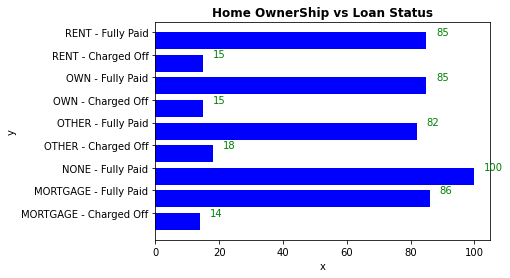

In [187]:
fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(data_home['categ_percentage']))  # the x locations for the groups
for i, v in enumerate(data_home['categ_percentage']):
    ax.text(v + 3, i + .25, str(v), color='green')
ax.barh(ind, data_home['categ_percentage'], width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(data_home['home_realtion_loan'])
plt.title('Home OwnerShip vs Loan Status', fontweight='bold')
plt.xlabel('x')
plt.ylabel('y')      
plt.show()

## Below distribution shows that loans are provided to the customers around 10 - 20 dti and quite evident that few customers at around 30 %

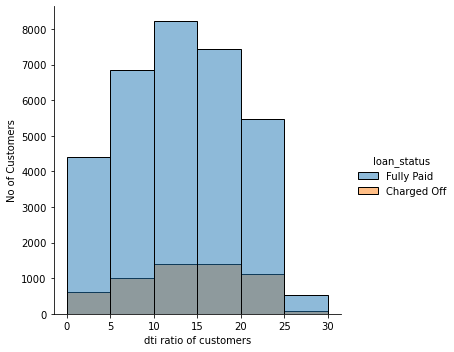

In [222]:
#data['dti']
sns.displot(data, x="dti", color = 'blue', binwidth=5, hue = 'loan_status')
plt.xlabel('dti ratio of customers')
plt.ylabel('No of Customers')
plt.show()

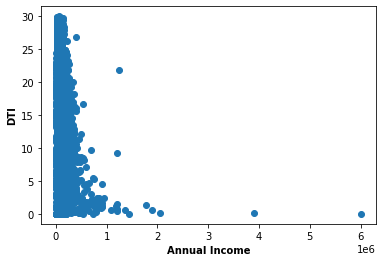

In [223]:
plt.scatter(data['annual_inc'], data['dti'] )
plt.xlabel("Annual Income", fontweight='bold')
plt.ylabel("DTI", fontweight='bold')
plt.show()

# Converting dti continous variable to categorical variable

In [228]:
data.loc[(data.dti <= 10), 'dti_category'] = 'high_potential'
data.loc[( (data.dti > 10) & (data.dti <= 20) ), 'dti_category'] = 'med_potential'
data.loc[(data.dti  > 20), 'dti_category'] = 'low_potential'

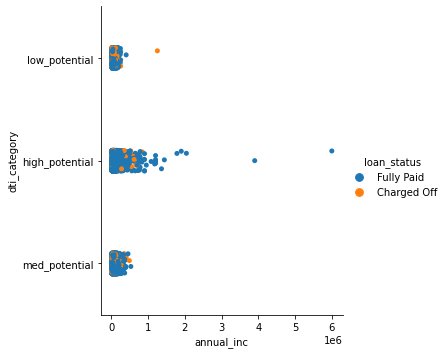

In [229]:
sns.catplot(x="annual_inc", y="dti_category", hue='loan_status' , data=data)

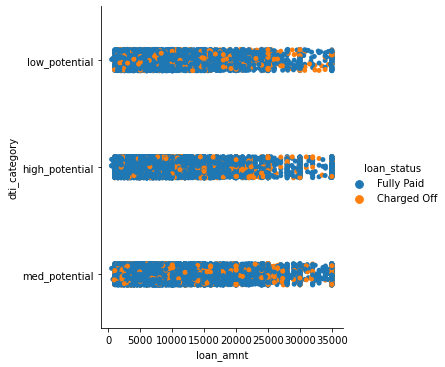

In [226]:
sns.catplot(x="loan_amnt", y="dti_category", hue='loan_status' , data=data)
plt.show()

In [230]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'annual_category', 'dti_category', 'year',
       'month'],
      dtype='object')

## DTI relationship with loan status

In [239]:
#data[['dti_category', 'loan_status']]
data_dti = data.groupby(['dti_category', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
data_dti['Total'] = data_dti['Charged Off']  + data_dti['Fully Paid'] 
data_dti['Chargedoff_Proportion'] = data_dti['Charged Off'] / data_dti['Total']
data_dti.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,dti_category,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,low_potential,1205,5996,7201,0.167338
2,med_potential,2791,15650,18441,0.151348
0,high_potential,1631,11304,12935,0.126092


No handles with labels found to put in legend.


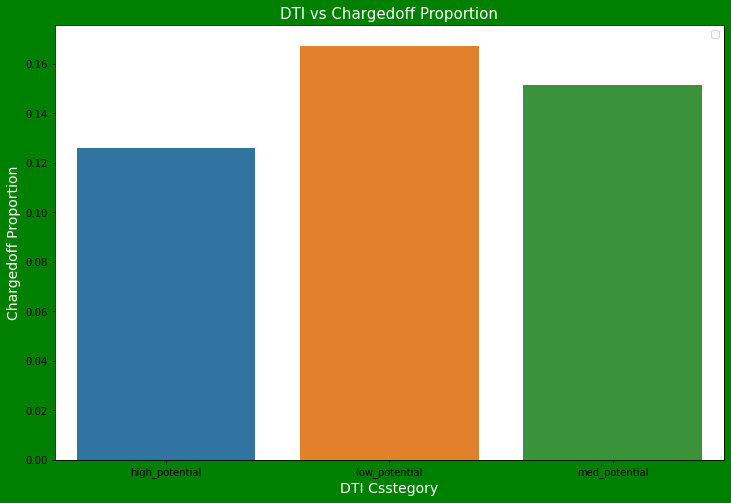

In [243]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('DTI vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='dti_category', y='Chargedoff_Proportion', data=data_dti)
ax1.set_xlabel('DTI Csstegory',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [193]:
emplen_vs_loan = data.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off']  + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,10+ years,1331,7157,8488,0.156810
7,7 years,263,1448,1711,0.153711
0,1 year,456,2713,3169,0.143894
5,5 years,458,2736,3194,0.143394
10,< 1 year,639,3869,4508,0.141748
6,6 years,307,1861,2168,0.141605
8,8 years,203,1232,1435,0.141463
3,3 years,555,3457,4012,0.138335
4,4 years,462,2880,3342,0.138241
2,2 years,567,3724,4291,0.132137


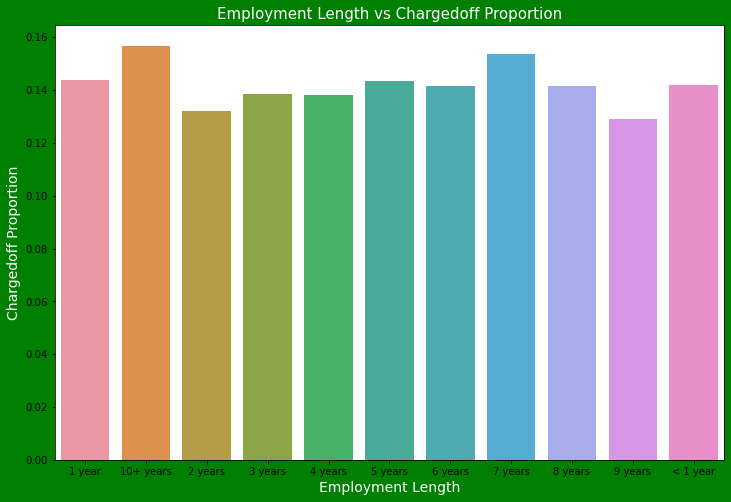

In [194]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emplen_vs_loan)
ax1.set_xlabel('Employment Length',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

In [212]:
data['int_rate'] = data['int_rate'].astype(str).str.replace('%', '').astype('float')

In [215]:
data.issue_d = pd.to_datetime(data.issue_d, format='%b-%y')
data['year']=data['issue_d'].dt.year
data['month']=data['issue_d'].dt.month

In [216]:
data_multi = data[['loan_amnt', 'annual_inc', 'term', 'dti', 'loan_status', 'int_rate', 'year']]

## 1. You see here higher the interest rate high the default
## 2. Deafult rate is increase as the year progresses

/Users/karthikeyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


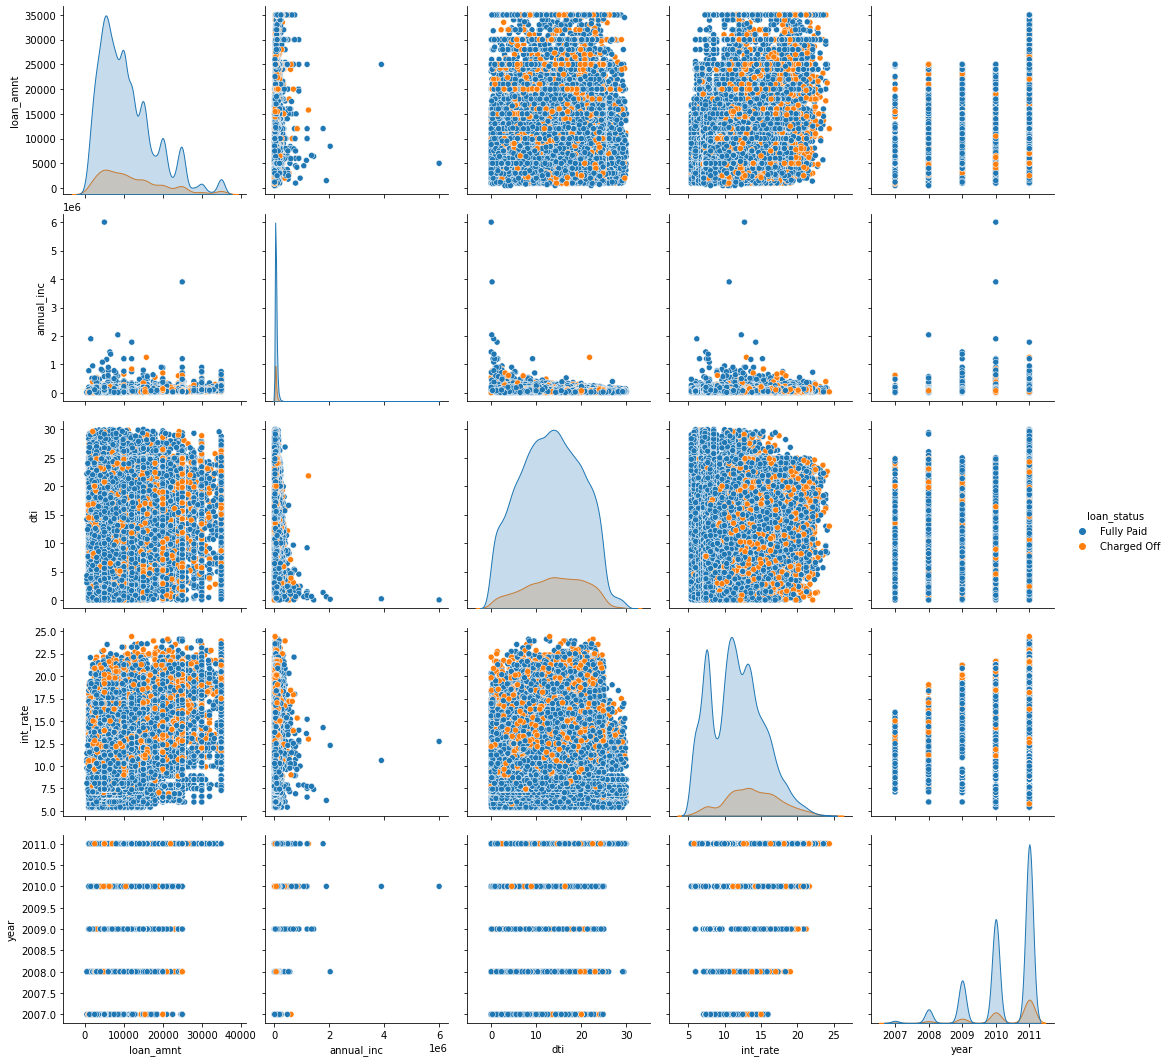

In [217]:
sns.pairplot(data_multi, hue='loan_status', diag_kind = 'kde', size = 3)